<a href="https://colab.research.google.com/github/francianerod/Doutorado-ESAN-UFMS/blob/main/C%C3%93DIGO_TESE_PARTE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Código feito por:** Franciane Rodrigues

**Parte 2:** Avaliação do grau de significância do fator clima da PTF da soja e proposta de modelo regressivo para rendimento (kg/ha)

**Técnica:** Técnica Multivariada Confirmatória

**Periodo:** 2006 e 2017 

**Fonte de dados:** PAM-IBGE, CENSO AGROPECUÁRIO, IPEADATA e ERA5/meteoblue. 

In [ ]:
# Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **INSTALAÇÃO E ABERTURA DE PACOTES GERAIS** 

In [ ]:
#!pip install pandas-profiling
#!pip install --upgrade pandas-profiling

In [ ]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
#from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

### **BASE DE DADOS**

In [ ]:
# Base de dados 
df2 = pd.read_excel('/content/drive/MyDrive/Tese/Dados TESE - PARTE 2.xlsx', sheet_name= 'Oficial')
df2.head()

,Rendimento médio (kg/ha),Área colhida (ha),Quantidade produzida (ton),Valor de produção (mil reais),Total de contratos,Estoque de crédito rural (reais),Pessoal ocupado,Número de maquinário,Temperatura Media Anual (°C),Precipitação Media Semestral (mm)
0,2300,25000,57500,19550,23,5.210879e+06,179,398,25.0,585.50
1,2100,9000,18900,6426,5,5.751346e+05,114,90,25.6,626.60
2,1391,35600,49555,18088,55,6.315060e+06,477,780,22.8,625.05
3,2700,180,486,170,4,3.055913e+05,258,50,25.8,678.30
4,2500,3800,9500,3249,7,3.209651e+05,96,106,24.7,576.40


### **RELATÓRIO DE ANÁLISE DE DADOS EXPLORATÓRIA**

In [ ]:
#Informação da base de dados
#df2.info()

In [ ]:
# executa a função que gera o relatório
# relatorio = ProfileReport(df2, title='Rendimento')
# relatorio.to_file(output_file="relatorio_parte2.html")

### **PRÉ-PROCESSAMENTO DOS DADOS**

In [ ]:
# Padronizando os dados
from sklearn.preprocessing import StandardScaler

# Cria o objeto scaler
scaler = StandardScaler()

# Fit e transformação dos dados
df2_padronizado = pd.DataFrame(scaler.fit_transform(df2))

# Criando um dicionário de nomes
nomes= {0: "Rendimento médio", 
        1: "Área colhida", 
        2: "Quantidade produzida",
        3: "Valor de produção",
        4: "Total de Contratos",
        5: "Estoque de crédito rural",
        6: "Pessoal ocupado",
        7: "Maquinário",
        8: "Temperatura",
        9: "Precipitação"
        }

# Renomeando as colunas
df2_padronizado = df2_padronizado.rename(columns=nomes)
df2_padronizado

,Rendimento médio,Área colhida,Quantidade produzida,Valor de produção,Total de Contratos,Estoque de crédito rural,Pessoal ocupado,Maquinário,Temperatura,Precipitação
0,-0.560672,-0.150966,-0.237493,-0.370283,-0.197154,-0.108761,-0.588792,-0.506809,0.904984,-1.449643
1,-0.828556,-0.481051,-0.484046,-0.468659,-0.572970,-0.377708,-0.642162,-0.862493,1.551401,-1.057093
2,-1.778205,0.067716,-0.288241,-0.381242,0.470963,-0.044701,-0.344112,-0.065668,-1.465212,-1.071897
3,-0.024904,-0.663011,-0.601663,-0.515552,-0.593849,-0.393345,-0.523927,-0.908685,1.766873,-0.563301
4,-0.292788,-0.588329,-0.544088,-0.492473,-0.531213,-0.392453,-0.656941,-0.844016,0.581775,-1.536559
...,...,...,...,...,...,...,...,...,...,...
135,-0.024904,-0.377900,-0.363325,-0.256152,-0.322426,-0.355918,-0.470558,-0.354373,-1.465212,0.729442
136,0.376922,-0.571825,-0.516622,-0.428586,-0.447698,-0.374358,-0.536244,-0.721605,0.258567,0.366022
137,1.019844,-0.354175,-0.268031,-0.155243,-0.134518,-0.066699,0.223250,0.555624,0.150831,0.395153
138,-0.740154,-0.659504,-0.599926,-0.511715,-0.510334,0.749460,-0.680753,1.641154,0.797248,-0.432450


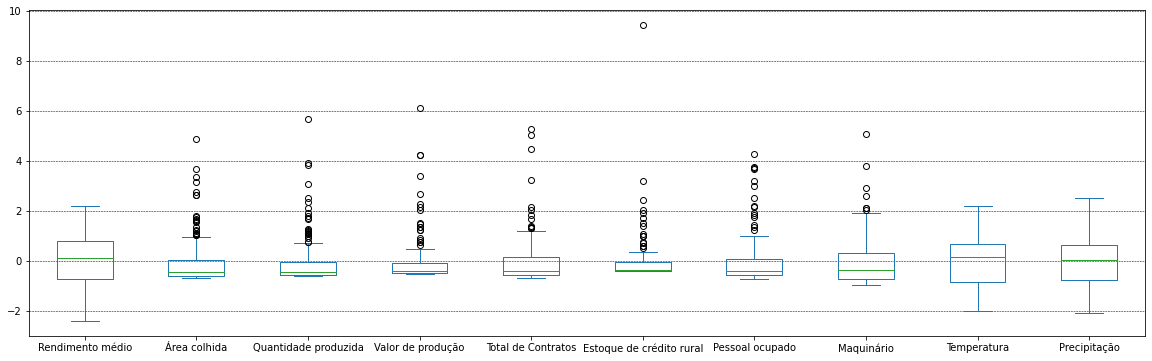

In [ ]:
# Visualização da padronização
df2_padronizado[['Rendimento médio',	
                 'Área colhida',	
                 'Quantidade produzida',	
                 'Valor de produção', 
                 'Total de Contratos',	
                 'Estoque de crédito rural',	
                 'Pessoal ocupado',	
                 'Maquinário',	
                 'Temperatura',	
                 'Precipitação']].plot.box(figsize=(20,6))
                 
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')
plt.show()

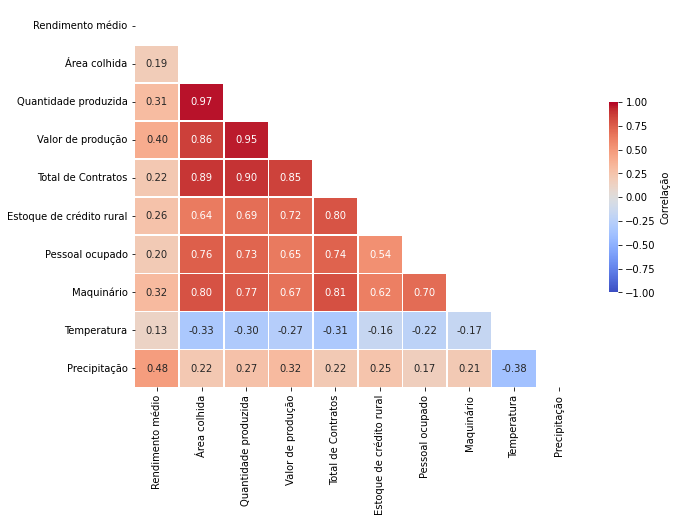

In [ ]:
# Correlação de Pearson om dados padronizados
# Definição da variável resposta: Rendimento Médio de Soja (kg/ha)

correlation = df2_padronizado.corr(method='pearson')
mascara = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize = ((10, 7)))
plot = sns.heatmap(correlation, 
                   mask=mascara,
                   annot = True, 
                   fmt=".2f", vmax=1, center=0, vmin=-1, 
                   cbar=True, cmap='coolwarm', 
                   linewidths=.5, 
                   cbar_kws={"shrink": .5, 'label': 'Correlação', 'orientation': 'vertical'})

plt.show()

### **MODELO DE REGRESSÃO MÚLTIPLA COM DADOS PADRONIZADOS**

In [ ]:
# Separaçaõ das variáveis

#Variáveis independentes
X = df2_padronizado.drop(['Rendimento médio'],axis=1)

#Variável dependentes
y = df2_padronizado['Rendimento médio']

In [ ]:
# Importação do Pacote
import statsmodels.api as sm

# modelo de regressão múltipla
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
modelo1.summary(title='Sumário do modelo com intercepto com todas as variáveis')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
           Sumário do modelo com intercepto com todas as variáveis            
==============================================================================
Dep. Variable:       Rendimento médio   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     25.31
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.20e-24
Time:                        22:11:23   Log-Likelihood:                -127.78
No. Observations:                 140   AIC:                             275.6
Df Residuals:                     130   BIC:                             305.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.469e-17      0.053  -6.56e-16      1.000      -0.105       0.105
Área colhida                -3.7014      0.590     -6.269      0.000      -4.870      -2.533
Quantidade produzida         4.7671      0.931      5.121      0.000       2.925       6.609
Valor de produção           -1.2492      0.444     -2.815      0.006      -2.127      -0.371
Total de Contratos          -0.0682      0.174     -0.392      0.696      -0.413       0.276
Estoque de crédito rural    -0.1653      0.097     -1.702      0.091      -0.357       0.027
Pessoal ocupado              0.0984      0.084      1.165      0.246      -0.069       0.265
Maquinário                   0.5043      0.102      4.968      0.000       0.304       0.705
Temperatura                  0.2273      0.064      3.531      0.001       0.100       0.355
Precipitação                 0.4336      0.062      7.046      0.000       0.312       0.555
==============================================================================
Omnibus:                        3.050   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.574
Skew:                          -0.242   Prob(JB):                        0.276
Kurtosis:                       3.454   Cond. No.                         53.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Procedimento Stepwise** 

In [ ]:
# Separaçaõ das variáveis - Retirada da variável Total de Contratos 

#Variáveis independentes
X = df2_padronizado.drop(['Rendimento médio', 'Total de Contratos'],axis=1)

#Variável dependentes
y = df2_padronizado['Rendimento médio']

In [ ]:
# Importação do Pacote
import statsmodels.api as sm

# modelo de regressão múltipla
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
modelo1.summary(title='Sumário do modelo com intercepto')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Sumário do modelo com intercepto                       
==============================================================================
Dep. Variable:       Rendimento médio   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.64
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           2.32e-25
Time:                        22:11:23   Log-Likelihood:                -127.86
No. Observations:                 140   AIC:                             273.7
Df Residuals:                     131   BIC:                             300.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.469e-17      0.053  -6.58e-16      1.000      -0.104       0.104
Área colhida                -3.7542      0.573     -6.552      0.000      -4.888      -2.621
Quantidade produzida         4.8157      0.920      5.236      0.000       2.996       6.635
Valor de produção           -1.2817      0.434     -2.950      0.004      -2.141      -0.422
Estoque de crédito rural    -0.1863      0.081     -2.310      0.022      -0.346      -0.027
Pessoal ocupado              0.0934      0.083      1.123      0.264      -0.071       0.258
Maquinário                   0.4923      0.096      5.105      0.000       0.302       0.683
Temperatura                  0.2323      0.063      3.695      0.000       0.108       0.357
Precipitação                 0.4382      0.060      7.284      0.000       0.319       0.557
==============================================================================
Omnibus:                        2.920   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.440
Skew:                          -0.236   Prob(JB):                        0.295
Kurtosis:                       3.442   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Separaçaõ das variáveis - Retirada da variável Total de Contratos e Estoque de Crédito Rural

#Variáveis independentes
X = df2_padronizado.drop(['Rendimento médio', 'Total de Contratos', 'Estoque de crédito rural'],axis=1)

#Variável dependentes
y = df2_padronizado['Rendimento médio']

In [ ]:
# Importação do Pacote
import statsmodels.api as sm

# modelo de regressão múltipla
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
modelo1.summary(title='Sumário do modelo 1 com intercepto')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Sumário do modelo 1 com intercepto                      
==============================================================================
Dep. Variable:       Rendimento médio   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     30.95
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           5.09e-25
Time:                        22:11:23   Log-Likelihood:                -130.66
No. Observations:                 140   AIC:                             277.3
Df Residuals:                     132   BIC:                             300.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.469e-17      0.054  -6.48e-16      1.000      -0.106       0.106
Área colhida            -3.8226      0.582     -6.573      0.000      -4.973      -2.672
Quantidade produzida     5.0118      0.931      5.385      0.000       3.171       6.853
Valor de produção       -1.4990      0.431     -3.477      0.001      -2.352      -0.646
Pessoal ocupado          0.0803      0.084      0.951      0.343      -0.087       0.247
Maquinário               0.4363      0.095      4.600      0.000       0.249       0.624
Temperatura              0.2256      0.064      3.535      0.001       0.099       0.352
Precipitação             0.4343      0.061      7.107      0.000       0.313       0.555
==============================================================================
Omnibus:                        3.419   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                2.959
Skew:                          -0.261   Prob(JB):                        0.228
Kurtosis:                       3.484   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Separaçaõ das variáveis - Retirada da variável Total de Contratos, Estoque de Crédito Rural e Pessoal Ocupado

#Variáveis independentes
X = df2_padronizado.drop(['Rendimento médio', 'Total de Contratos', 'Estoque de crédito rural', 'Pessoal ocupado'],axis=1)

#Variável dependentes
y = df2_padronizado['Rendimento médio']

In [ ]:
# Importação do Pacote
import statsmodels.api as sm

# modelo de regressão múltipla
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
modelo1.summary(title='Sumário do modelo 2 com intercepto - Procedimento Stepwise')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
          Sumário do modelo 2 com intercepto - Procedimento Stepwise          
==============================================================================
Dep. Variable:       Rendimento médio   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     35.99
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.26e-25
Time:                        22:11:23   Log-Likelihood:                -131.14
No. Observations:                 140   AIC:                             276.3
Df Residuals:                     133   BIC:                             296.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.469e-17      0.054  -6.48e-16      1.000      -0.106       0.106
Área colhida            -3.7422      0.575     -6.506      0.000      -4.880      -2.604
Quantidade produzida     4.9520      0.928      5.335      0.000       3.116       6.788
Valor de produção       -1.4724      0.430     -3.424      0.001      -2.323      -0.622
Maquinário               0.4560      0.093      4.928      0.000       0.273       0.639
Temperatura              0.2269      0.064      3.557      0.001       0.101       0.353
Precipitação             0.4341      0.061      7.105      0.000       0.313       0.555
==============================================================================
Omnibus:                        3.858   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.376
Skew:                          -0.297   Prob(JB):                        0.185
Kurtosis:                       3.475   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **DIAGNÓSTICO DO MODELO DE REGRESSÃO MÚLTIPLA**

Pressupostos
*   Normalidade dos resíduos
*   Inexistência de Multicolinearidade
*   Ausência de Heterocedasticidade
*   Autocorrelação dos resíduos

Especificação do modelo e omissão de variáveis
*   Teste White

Outliers
*   Análise de Influência

**Primeiro pressuposto: Normalidade dos resíduos** 
*Assegura que que os valores p dos testes t e F são válidos.*

In [ ]:
residuos1 = modelo1.resid

In [ ]:
# Teste se os resíduos diferem de uma distribuição normal
# Teste Omnibus de normalidade.
# Essa função testa a hipótese nula de que uma amostra vem de uma distribuição normal. 
# É baseado no teste de D'Agostino e Pearson que combina skew e kurtosis para produzir um teste omnibus de normalidade.

from scipy.stats import normaltest
normaltest(residuos1)

NormaltestResult(statistic=3.858029766712865, pvalue=0.1452912568427498)

In [ ]:
# Avaliação de rejeição ou não rejeição

alpha = 0.05
k2, p = normaltest(residuos1)

# Hipotese nula: Os dados seguem distribuição normal
# Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

A hipótese nula não pode ser rejeitada


In [ ]:
# A estatística de teste Jarque-Bera testa o nulo de que os dados são normalmente distribuídos contra uma alternativa de que os dados seguem alguma outra distribuição. 
# É um teste de adequação para verificar se os dados da amostra tem assimetria e curtose correspondente a distribuição normal.

from scipy.stats import kurtosis
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Jarque-Bera', 'p-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuos1)
print(dict(zip(name, test)))

{'Jarque-Bera': 3.3762781819768155, 'p-value': 0.1848632177302052, 'Skew': -0.29705952183233997, 'Kurtosis': 3.475197966574675}


**Segundo pressuposto: inexistência de multicolinearidade** 

In [ ]:
df2_padronizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rendimento médio          140 non-null    float64
 1   Área colhida              140 non-null    float64
 2   Quantidade produzida      140 non-null    float64
 3   Valor de produção         140 non-null    float64
 4   Total de Contratos        140 non-null    float64
 5   Estoque de crédito rural  140 non-null    float64
 6   Pessoal ocupado           140 non-null    float64
 7   Maquinário                140 non-null    float64
 8   Temperatura               140 non-null    float64
 9   Precipitação              140 non-null    float64
dtypes: float64(10)
memory usage: 11.1 KB


In [ ]:
# Retirada de variáveis do modelo final
modelo_teste = df2_padronizado.drop(['Rendimento médio', 'Total de Contratos', 'Estoque de crédito rural', 'Pessoal ocupado'],axis=1)
modelo_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Área colhida          140 non-null    float64
 1   Quantidade produzida  140 non-null    float64
 2   Valor de produção     140 non-null    float64
 3   Maquinário            140 non-null    float64
 4   Temperatura           140 non-null    float64
 5   Precipitação          140 non-null    float64
dtypes: float64(6)
memory usage: 6.7 KB


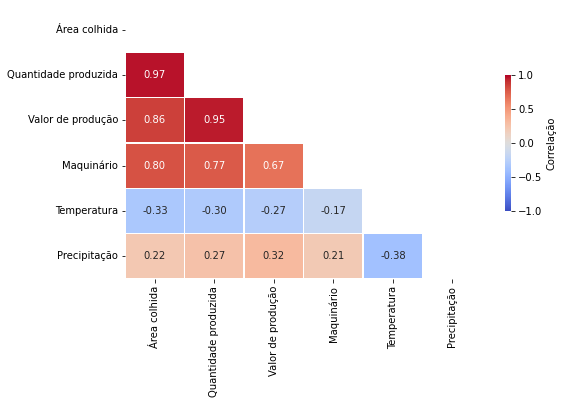

In [ ]:
# Correlação de Pearson com dados padronizados após procedimento Stepwise

correlation = modelo_teste.corr(method='pearson')
mascara = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize = ((8, 5)))
plot = sns.heatmap(correlation, 
                   mask=mascara,
                   annot = True, 
                   fmt=".2f", vmax=1, center=0, vmin=-1, 
                   cbar=True, cmap='coolwarm', 
                   linewidths=.5, 
                   cbar_kws={"shrink": .5, 'label': 'Correlação', 'orientation': 'vertical'})

plt.show()

In [ ]:
# Primeira rodagem: Estatística VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = modelo_teste[['Área colhida', 'Quantidade produzida', 'Valor de produção', 'Maquinário', 'Temperatura','Precipitação']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variáveis"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

              Variáveis         VIF
0          Área colhida  115.439544
1  Quantidade produzida  300.627870
2     Valor de produção   64.512727
3            Maquinário    2.987221
4           Temperatura    1.419856
5          Precipitação    1.302399


In [ ]:
# Segunda rodagem: Estatística VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = modelo_teste[['Área colhida', 'Valor de produção', 'Maquinário', 'Temperatura','Precipitação']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variáveis"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

           Variáveis       VIF
0       Área colhida  6.704853
1  Valor de produção  4.280755
2         Maquinário  2.932204
3        Temperatura  1.321195
4       Precipitação  1.298585


**Terceiro pressuposto: Homocedasticidade** 

In [ ]:
residuos1 = modelo1.resid

In [ ]:
from scipy import stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Teste Breush-Pagan
nomes = ['Estatística Multiplicador de Lagrange','p-valor','Estatística F','f p-valor']
for i,j in zip(nomes,het_breuschpagan(modelo1.resid, modelo1.model.exog)):
    print(i,':',j)

Estatística Multiplicador de Lagrange : 5.195553118129053
p-valor : 0.5189879020768007
Estatística F : 0.8543345325948256
f p-valor : 0.530454604564776


**Quarto pressuposto: Autocorrelação dos resíduos:** como o banco de dados é uma cross-section, não será avaliado o pressuposto de autocorrelação dos resíduos.

**Teste de Especificação de White** 

*   𝐻0: O modelo é homocedástico e está bem especificado
*   𝐻1: O modelo não é homocedástico e não está bem especificado

In [ ]:
from statsmodels.stats.diagnostic import spec_white
nome = ['Estatística do teste', 'p-valor','Graus de liberdade']
lzip(nome,spec_white(modelo1.resid, modelo1.model.exog))

[('Estatística do teste', 31.004651781699586),
 ('p-valor', 0.2709476413466895),
 ('Graus de liberdade', 27)]

In [ ]:
# Abertura de pacotes especificos
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import OLSInfluence

**Análise de influência** 

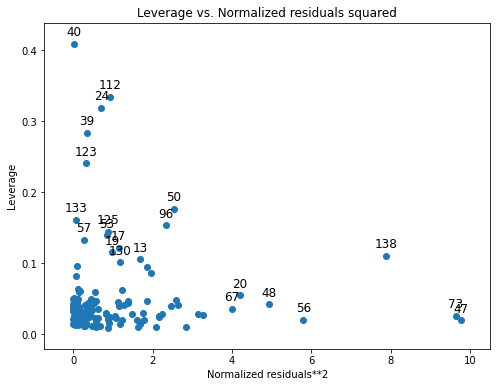

In [ ]:
# Análise de pontos de alavanca: observações cujo os regressores apresentam padrão atípico.
# Traçar estatísticas de alavancagem versus resíduos normalizados ao quadrado
fig, ax = plt.subplots(figsize=(8, 6))
plot_leverage_resid2(modelo1, ax=ax)
plt.show()

**Gráficos complementares** 

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


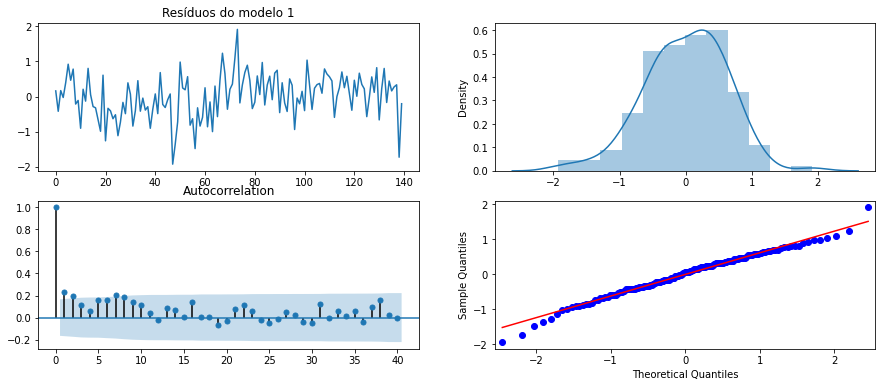

In [ ]:
residuos1 = modelo1.resid

fig, ax = plt.subplots(2,2,figsize=(15,6))

residuos1.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

plt.show()

### **MODELO DE PRODUTIVIDADE (RENDIMENTO) DA SOJICULTURA NO MS SEM OUTLIERS COM DADOS PADRONIZADOS E NÃO PADRONIZADOS**

**Modelo com dados padronizados** 

In [ ]:
# Base de dados
df_so = df2_padronizado.drop(['Quantidade produzida', 
                              'Total de Contratos', 
                              'Estoque de crédito rural', 
                              'Pessoal ocupado'],axis=1)

In [ ]:
# Retirando os outliers de moderados e extremos
from scipy import stats
df_so = df_so[(np.abs(stats.zscore(df_so)) < 1.5).all(axis=1)]

In [ ]:
# Informação do novo banco de dados
df_so.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 139
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rendimento médio   80 non-null     float64
 1   Área colhida       80 non-null     float64
 2   Valor de produção  80 non-null     float64
 3   Maquinário         80 non-null     float64
 4   Temperatura        80 non-null     float64
 5   Precipitação       80 non-null     float64
dtypes: float64(6)
memory usage: 4.4 KB


In [ ]:
# Separaçaõ das variáveis

#Variáveis independentes
X = df_so.drop(['Rendimento médio'],axis=1)

#Variável dependentes
y = df_so['Rendimento médio']

In [ ]:
# Importação do Pacote
import statsmodels.api as sm

# modelo de regressão múltipla
modelo_FINAL_so = (sm.OLS(y,sm.add_constant(X)).fit())
modelo_FINAL_so.summary(title='Sumário do modelo FINAL com intercepto sem outliers (m-e)')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
          Sumário do modelo FINAL com intercepto sem outliers (m-e)           
==============================================================================
Dep. Variable:       Rendimento médio   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     30.86
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           7.95e-17
Time:                        22:11:25   Log-Likelihood:                -48.684
No. Observations:                  80   AIC:                             109.4
Df Residuals:                      74   BIC:                             123.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3000      0.059      5.118      0.000       0.183       0.417
Área colhida         -1.2319      0.179     -6.897      0.000      -1.588      -0.876
Valor de produção     1.1874      0.207      5.728      0.000       0.774       1.600
Maquinário            0.7612      0.145      5.253      0.000       0.472       1.050
Temperatura           0.2781      0.073      3.807      0.000       0.133       0.424
Precipitação          0.3118      0.072      4.351      0.000       0.169       0.455
==============================================================================
Omnibus:                        0.834   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.885
Skew:                           0.110   Prob(JB):                        0.642
Kurtosis:                       2.534   Cond. No.                         5.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo com dados sem padronização** 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rendimento médio (kg/ha)           140 non-null    int64  
 1   Área colhida (ha)                  140 non-null    int64  
 2   Quantidade produzida (ton)         140 non-null    int64  
 3   Valor de produção (mil reais)      140 non-null    int64  
 4   Total de contratos                 140 non-null    int64  
 5   Estoque de crédito rural (reais)   140 non-null    float64
 6   Pessoal ocupado                    140 non-null    int64  
 7   Número de maquinário               140 non-null    int64  
 8   Temperatura Media Anual (°C)       140 non-null    float64
 9   Precipitação Media Semestral (mm)  140 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 11.1 KB


In [ ]:
# Retirando os outliers de moderados e extremos
from scipy import stats
df2 = df2[(np.abs(stats.zscore(df2)) < 1.5).all(axis=1)]

In [ ]:
#Variáveis independentes
X = df2.drop(['Rendimento médio (kg/ha)', 'Quantidade produzida (ton)', 'Total de contratos', 'Estoque de crédito rural (reais)', 'Pessoal ocupado'],axis=1)

#Variável dependentes
y = df2['Rendimento médio (kg/ha)']

In [ ]:
# Importação do Pacote
import statsmodels.api as sm

# modelo de regressão múltipla
modelo_FINAL_so = (sm.OLS(y,sm.add_constant(X)).fit())
modelo_FINAL_so.summary(title='Sumário do modelo FINAL com intercepto sem outliers (m-e)')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
             Sumário do modelo FINAL com intercepto sem outliers (m-e)              
====================================================================================
Dep. Variable:     Rendimento médio (kg/ha)   R-squared:                       0.694
Model:                                  OLS   Adj. R-squared:                  0.673
Method:                       Least Squares   F-statistic:                     31.80
Date:                      Mon, 23 Jan 2023   Prob (F-statistic):           9.30e-17
Time:                              22:12:12   Log-Likelihood:                -547.05
No. Observations:                        76   AIC:                             1106.
Df Residuals:                            70   BIC:                             1120.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -5169.6522   1627.353     -3.177      0.002   -8415.306   -1923.999
Área colhida (ha)                    -0.0183      0.003     -6.233      0.000      -0.024      -0.012
Valor de produção (mil reais)         0.0072      0.001      5.645      0.000       0.005       0.010
Número de maquinário                  0.6684      0.124      5.368      0.000       0.420       0.917
Temperatura Media Anual (°C)        244.5365     60.117      4.068      0.000     124.636     364.437
Precipitação Media Semestral (mm)     2.4128      0.533      4.524      0.000       1.349       3.477
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.926
Skew:                           0.245   Prob(JB):                        0.382
Kurtosis:                       2.392   Cond. No.                     2.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""